<a href="https://colab.research.google.com/github/AhmadFadlulloh23/Machine_Learning/blob/main/UTS/UTS_ML_TRAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INPUT LIBARY

In [4]:
pip install catboost

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [6]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# INPUT DATASET

In [7]:

train = pd.read_csv('/content/drive/MyDrive/train.csv')

<ipython-input-7-2441b9de3c73>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/train.csv')


# CHECKING DATA

In [8]:
train[:8]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [9]:
# @title Analisis deskriftif
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [10]:
# @title Mengecek Nilai Negatif
# Menghitung jumlah nilai yang bukan nol dalam setiap kolom
jumlah_non_zero = train.any().sum()

# Menampilkan hasil dalam bentuk data
data_hasil = pd.DataFrame({'Kolom': train.columns, 'Jumlah Non-Zero': [train[col].astype(bool).sum() for col in train.columns]})
print(data_hasil)

                       Kolom  Jumlah Non-Zero
0                         ID           100000
1                Customer_ID           100000
2                      Month           100000
3                       Name           100000
4                        Age           100000
5                        SSN           100000
6                 Occupation           100000
7              Annual_Income           100000
8      Monthly_Inhand_Salary           100000
9          Num_Bank_Accounts            95672
10           Num_Credit_Card            99987
11             Interest_Rate           100000
12               Num_of_Loan           100000
13              Type_of_Loan           100000
14       Delay_from_due_date            98805
15    Num_of_Delayed_Payment           100000
16      Changed_Credit_Limit           100000
17      Num_Credit_Inquiries            93028
18                Credit_Mix           100000
19          Outstanding_Debt           100000
20  Credit_Utilization_Ratio      

In [11]:
# @title Mengecek data yang hilang
train.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
# @title Duplikat checking
train.duplicated().sum()

0

In [13]:
for col in train.columns:
    print(f'{col} : {pd.api.types.infer_dtype(train[col])}')

ID : string
Customer_ID : string
Month : string
Name : string
Age : string
SSN : string
Occupation : string
Annual_Income : string
Monthly_Inhand_Salary : floating
Num_Bank_Accounts : integer
Num_Credit_Card : integer
Interest_Rate : integer
Num_of_Loan : string
Type_of_Loan : string
Delay_from_due_date : integer
Num_of_Delayed_Payment : string
Changed_Credit_Limit : string
Num_Credit_Inquiries : floating
Credit_Mix : string
Outstanding_Debt : string
Credit_Utilization_Ratio : floating
Credit_History_Age : string
Payment_of_Min_Amount : string
Total_EMI_per_month : floating
Amount_invested_monthly : string
Payment_Behaviour : string
Monthly_Balance : mixed
Credit_Score : string


# MENGHAPUS DUPLIKAT

In [14]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

<ipython-input-14-c42ad7b9f4e5>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/train.csv')


In [15]:
duplikat_sebelum = df[df.duplicated()]

In [16]:
df_clean = df.drop_duplicates()

In [17]:
print(duplikat_sebelum)

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

[0 rows x 28 columns]


In [18]:
print(df_clean)

            ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12

# MENGHAPUS KOLOM

In [19]:
train.drop(['ID','Name','SSN','Month'],axis=1,inplace=True)

# TIPE YANG SALAH

In [20]:
wrong_types = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
               'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']

In [21]:
for col in wrong_types:
    if train[col][train[col] == '_'].any():
        print(col)

Changed_Credit_Limit


In [22]:
train.loc[train.Changed_Credit_Limit == '_','Changed_Credit_Limit'] = np.nan

In [23]:
for col in wrong_types:
    train[col] = train[col].str.replace('_','').astype('float64')

In [24]:
train.dtypes

Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

# MEMISAHKAN DAN MENGISI KOLOM

In [25]:
numerical = train.select_dtypes(include=['float64','int64']).columns
numerical


Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

In [26]:
categorical = train.select_dtypes(include=['object']).columns
categorical

Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')

In [27]:
(train.Customer_ID.value_counts() != 8).any()#each customer has 8 records

False

In [28]:
(train.Customer_ID.value_counts() == 8).sum()#number of customers

12500

**Usia, Pendapatan_Tahunan, dan Pekerjaan ditetapkan untuk setiap pelanggan**

In [29]:
train.Age = train.groupby('Customer_ID').Age.transform(lambda x : x.mode()[0])
train.Annual_Income = train.groupby('Customer_ID').Annual_Income.transform(lambda x : x.mode()[0])
train.Occupation = train.groupby('Customer_ID').Occupation.transform(lambda x : x.mode()[0])

In [30]:
for col in numerical:
    if train[col][train[col] < 0].any():
        print(col,len(train[col][train[col] < 0]))

Num_Bank_Accounts 21
Num_of_Loan 3876
Delay_from_due_date 591
Num_of_Delayed_Payment 644
Changed_Credit_Limit 1586
Monthly_Balance 9


In [31]:
train.Num_Bank_Accounts[train.Num_Bank_Accounts < 0].value_counts()#always -1 so it's definitely a mistake

Num_Bank_Accounts
-1    21
Name: count, dtype: int64

In [32]:
train.drop(train[train.Num_Bank_Accounts < 0].index,inplace=True)

In [33]:
train.Num_of_Loan[train.Num_of_Loan<0].value_counts()#always -100 so it's definitely a mistake

Num_of_Loan
-100.0    3875
Name: count, dtype: int64

In [34]:
train.drop(train[train.Num_of_Loan < 0].index,inplace=True)

In [35]:
train.reset_index(drop=True,inplace=True)

In [36]:
for col in numerical:
    if train[col][train[col] < 0].any():
        print(col,len(train[col][train[col] < 0]))

Delay_from_due_date 559
Num_of_Delayed_Payment 616
Changed_Credit_Limit 1525
Monthly_Balance 9


In [37]:
train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,96104.000000,96104.000000,81685.000000,96104.000000,96104.000000,96104.000000,96104.000000,96104.000000,89405.000000,94092.000000,94216.000000,96104.000000,96104.000000,96104.000000,91796.000000,9.334300e+04
mean,33.270707,50506.790217,4194.711239,17.096541,22.527606,72.354460,7.164832,21.072650,31.134489,10.394152,27.743090,1427.106101,32.288118,1409.238408,636.061659,-3.213953e+22
std,10.765046,38317.243974,3185.309650,117.309614,129.298964,466.483097,60.321139,14.861229,227.266979,6.795080,192.969963,1155.957167,5.114835,8324.403859,2040.035325,3.272959e+24
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,19337.160000,1625.188333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.022500,28.060916,30.305498,74.549548,2.698778e+02
50%,33.000000,36993.940000,3091.386667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.640000,32.307331,69.246684,135.821176,3.364020e+02
75%,42.000000,71681.400000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.890000,9.000000,1948.980000,36.500450,161.340704,265.579429,4.694649e+02
max,56.000000,179987.280000,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [38]:
train.Num_Bank_Accounts[train.Num_Bank_Accounts > 50].value_counts()

Num_Bank_Accounts
803     7
791     5
1668    5
105     5
1257    4
       ..
887     1
211     1
385     1
1221    1
697     1
Name: count, Length: 887, dtype: int64

In [39]:
train.drop(train[train.Num_Bank_Accounts > 50].index,inplace=True)

In [40]:
train.reset_index(drop=True,inplace=True)

In [41]:
train.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14217
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10839
Delay_from_due_date             0
Num_of_Delayed_Payment       6612
Changed_Credit_Limit         1988
Num_Credit_Inquiries         1855
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8580
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4250
Payment_Behaviour               0
Monthly_Balance              2723
Credit_Score                    0
dtype: int64

# MENGISI KOLOM NUMERIK  NULLS

In [42]:
null_num_cols = ['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']
imputer = SimpleImputer(strategy='mean')
imputed_numerical = pd.DataFrame(imputer.fit_transform(train[null_num_cols]),columns=null_num_cols)
imputed_numerical.isnull().sum()

Monthly_Inhand_Salary      0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Amount_invested_monthly    0
Monthly_Balance            0
dtype: int64

In [43]:
train[null_num_cols] = imputed_numerical

In [44]:
train.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10839
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8580
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

# NILAI YANG SALAH


In [45]:
train.Occupation.value_counts()

Occupation
Lawyer           6726
Engineer         6459
Architect        6455
Mechanic         6448
Scientist        6414
Accountant       6376
Developer        6366
Teacher          6347
Media_Manager    6333
Entrepreneur     6322
Doctor           6218
Journalist       6211
Manager          6115
Musician         6044
Writer           6029
_______             8
Name: count, dtype: int64

In [46]:
train.loc[train.Occupation == '_______','Occupation'] = np.nan

In [47]:
train.Type_of_Loan.value_counts()

Type_of_Loan
Not Specified                                                                                                                                          1318
Credit-Builder Loan                                                                                                                                    1202
Personal Loan                                                                                                                                          1197
Debt Consolidation Loan                                                                                                                                1188
Student Loan                                                                                                                                           1184
                                                                                                                                                       ... 
Credit-Builder Loan, Mortgage Loan, Mortgage Loan, 

In [48]:
train.Type_of_Loan[train.Type_of_Loan == '_'].any()#no wrong values

False

In [49]:
train.Credit_Mix.value_counts()

Credit_Mix
Standard    34586
Good        23056
_           19188
Bad         18041
Name: count, dtype: int64

In [50]:
train.loc[train.Credit_Mix == '_', 'Credit_Mix'] = np.nan

<Axes: xlabel='count', ylabel='Credit_Mix'>

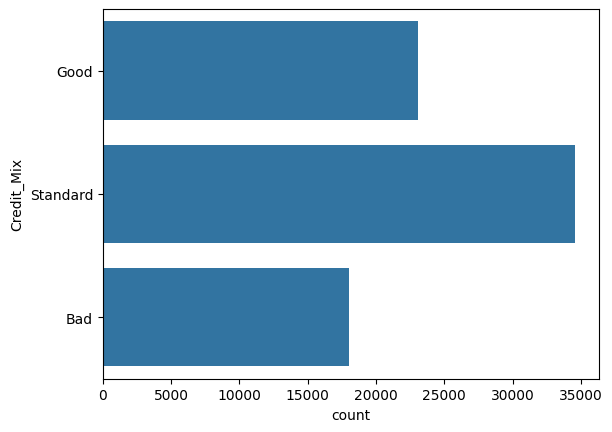

In [51]:
sns.countplot(train.Credit_Mix)

In [52]:
train.Credit_History_Age.value_counts()

Credit_History_Age
19 Years and 4 Months     426
19 Years and 5 Months     425
15 Years and 11 Months    424
17 Years and 9 Months     424
19 Years and 3 Months     421
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       13
33 Years and 7 Months      13
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64

In [53]:
train.Credit_History_Age[train.Credit_History_Age == '_'].any()#no wrong values

False

In [54]:
train.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    49670
No     33815
NM     11386
Name: count, dtype: int64

In [55]:
train.loc[train.Payment_of_Min_Amount == 'NM','Payment_of_Min_Amount'] = np.nan

<Axes: xlabel='count', ylabel='Payment_of_Min_Amount'>

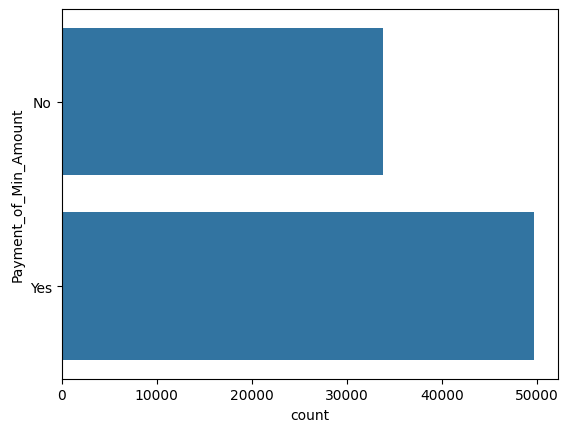

In [56]:
sns.countplot(train.Payment_of_Min_Amount)

In [57]:
train.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      24221
High_spent_Medium_value_payments    16632
Low_spent_Medium_value_payments     13161
High_spent_Large_value_payments     12974
High_spent_Small_value_payments     10760
Low_spent_Large_value_payments       9924
!@9#%8                               7199
Name: count, dtype: int64

In [58]:
train.loc[train.Payment_Behaviour == '!@9#%8','Payment_Behaviour'] = np.nan

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

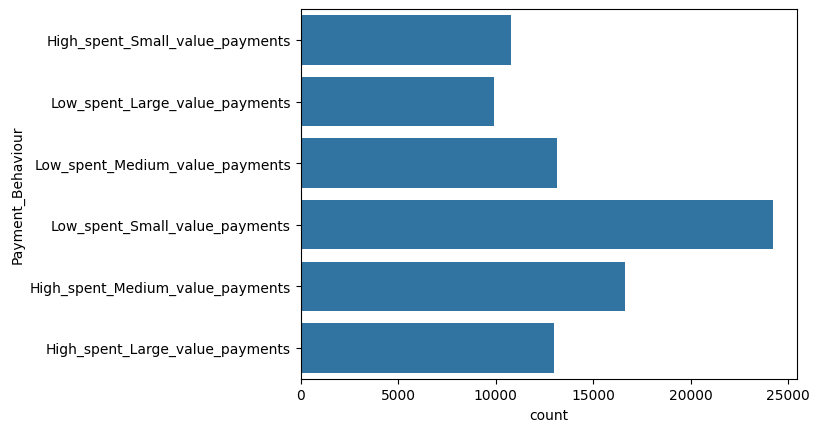

In [59]:
sns.countplot(train.Payment_Behaviour)

In [60]:
train.Credit_Score.value_counts()

Credit_Score
Standard    50491
Poor        27523
Good        16857
Name: count, dtype: int64

In [61]:
train.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      8
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10839
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                  19188
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8580
Payment_of_Min_Amount       11386
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour            7199
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

# MENGHAPUS ID

In [62]:
train.drop(['Customer_ID'],axis=1,inplace=True)

In [63]:
categorical = categorical.drop('Customer_ID')
categorical = categorical.drop('Credit_Score')

In [64]:
categorical

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

In [65]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical = pd.DataFrame(imputer.fit_transform(train[categorical]),columns=categorical)

In [66]:
train[categorical] = imputed_categorical

In [67]:
train.isnull().sum().any()

False

In [68]:
train.shape

(94871, 23)

# MENGECEK KORELASI

<Axes: >

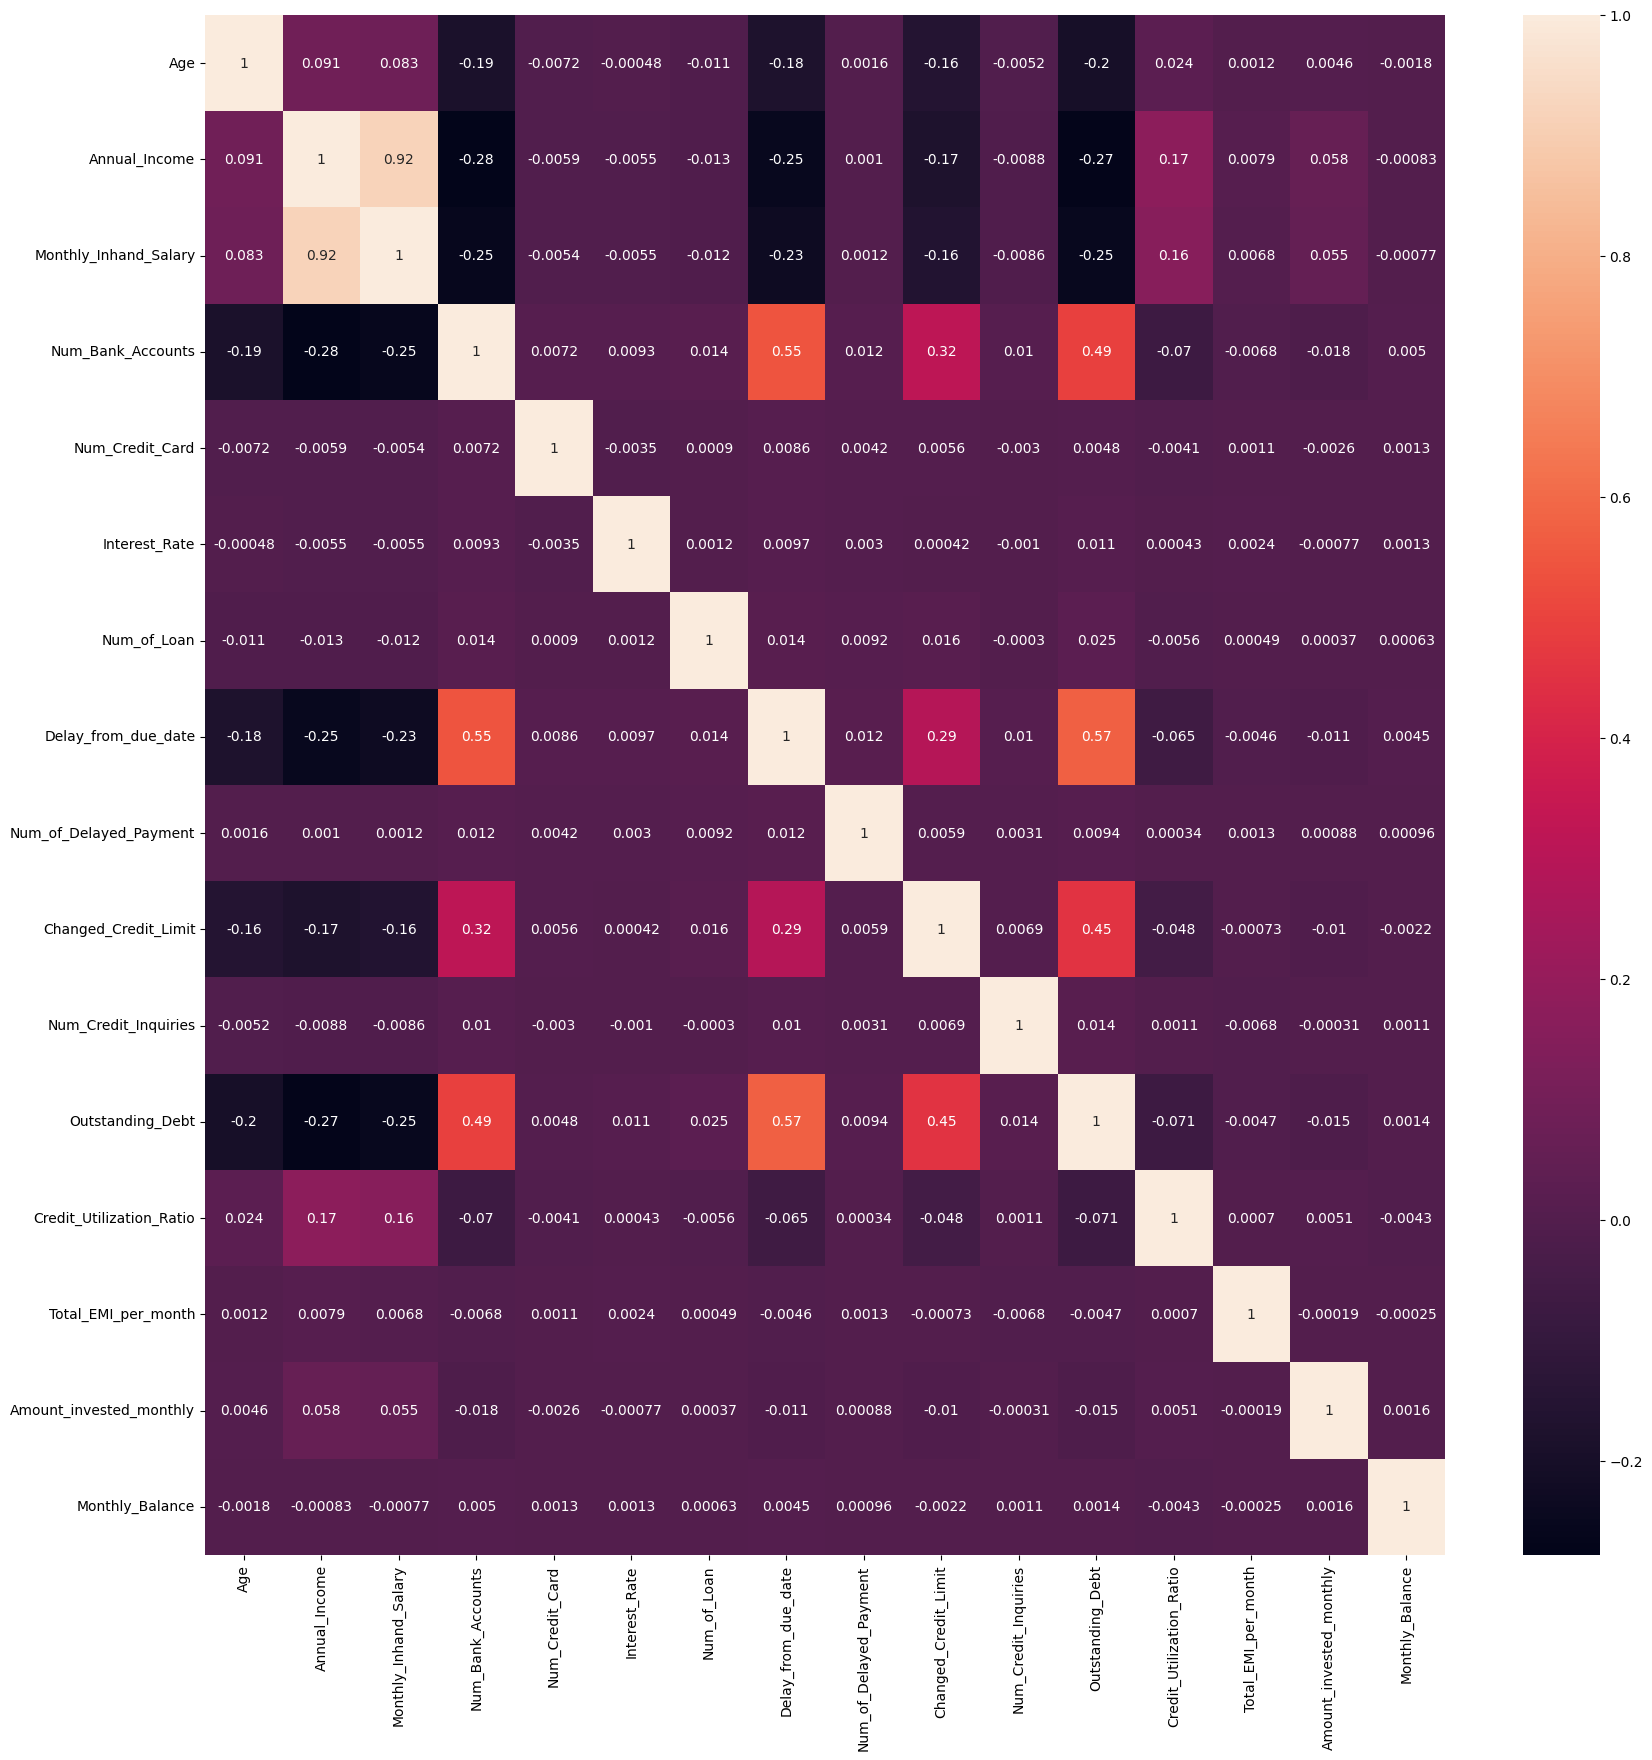

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(train[numerical].corr(),annot=True)

<Axes: >

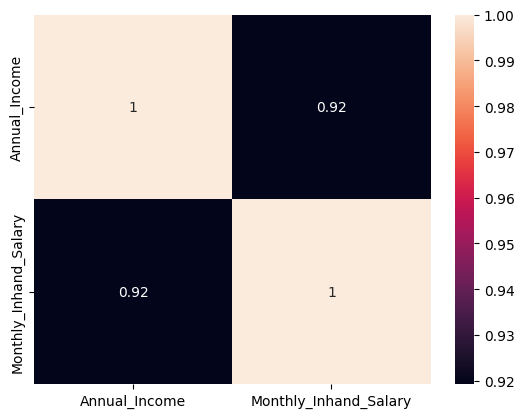

In [70]:
sns.heatmap(train[['Annual_Income','Monthly_Inhand_Salary']].corr(),annot=True)

In [71]:
train.drop(['Monthly_Inhand_Salary'],axis=1,inplace=True)

In [72]:
numerical = numerical.drop('Monthly_Inhand_Salary')
numerical

Index(['Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

# PENSKALAAN DAN PENGKODEAN

In [73]:
train[numerical] = StandardScaler().fit_transform(train[numerical])

In [74]:
train.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04,9.487100e+04
mean,5.212739e-17,-1.180356e-16,-5.422447e-17,2.067121e-17,-1.445486e-17,8.388315e-18,9.826312e-17,1.378080e-17,-1.653696e-16,-9.137272e-18,-2.019187e-16,1.901526e-15,3.063233e-17,-2.995827e-19,-9.923677e-18
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.789442e+00,-1.135775e+00,-2.025234e+00,-1.743784e-01,-1.530573e-01,-1.187571e-01,-1.753846e+00,-1.555898e-01,-2.511158e+00,-1.452211e-01,-1.234279e+00,-2.402581e+00,-1.692910e-01,-3.189411e-01,-1.026654e+02
25%,-8.607569e-01,-8.139212e-01,-8.958663e-01,-1.434799e-01,-1.380863e-01,-8.561877e-02,-7.445380e-01,-1.009934e-01,-7.396955e-01,-1.295222e-01,-7.451281e-01,-8.265197e-01,-1.656482e-01,-2.802844e-01,1.002821e-02
50%,-2.494023e-02,-3.527960e-01,-1.429542e-01,-1.357553e-01,-1.273927e-01,-6.904963e-02,-2.062405e-01,-7.369521e-02,-1.239227e-01,-1.138233e-01,-2.249243e-01,3.454878e-03,-1.609688e-01,-2.471615e-01,1.002821e-02
75%,8.108765e-01,5.523884e-01,6.099579e-01,-1.203060e-01,-1.124218e-01,-3.591136e-02,4.666315e-01,-5.549642e-02,6.361254e-01,-9.812434e-02,4.522337e-01,8.240983e-01,-1.499068e-01,-1.659773e-01,1.002821e-02
max,2.111036e+00,3.378818e+00,1.679757e+01,1.140485e+01,1.224291e+01,2.466867e+01,3.090832e+00,1.986308e+01,3.881575e+00,1.344482e+01,3.091238e+00,3.462990e+00,9.722368e+00,4.700224e+00,1.002821e-02


In [75]:
for col in categorical:
    train[col] = LabelEncoder().fit_transform(train[col])

In [76]:
train[categorical]

,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
0,12,128,2,180,0,2
1,12,128,1,137,0,3
2,12,128,1,184,0,4
3,12,128,1,185,0,5
4,12,128,1,186,0,1
...,...,...,...,...,...,...
94866,9,683,2,307,0,0
94867,9,683,2,308,0,1
94868,9,683,1,309,0,0
94869,9,683,1,310,0,3


In [77]:
X = train.drop('Credit_Score',axis=1)
y = train.Credit_Score

In [78]:
y.value_counts()

Credit_Score
Standard    50491
Poor        27523
Good        16857
Name: count, dtype: int64

<Axes: xlabel='Credit_Score', ylabel='Count'>

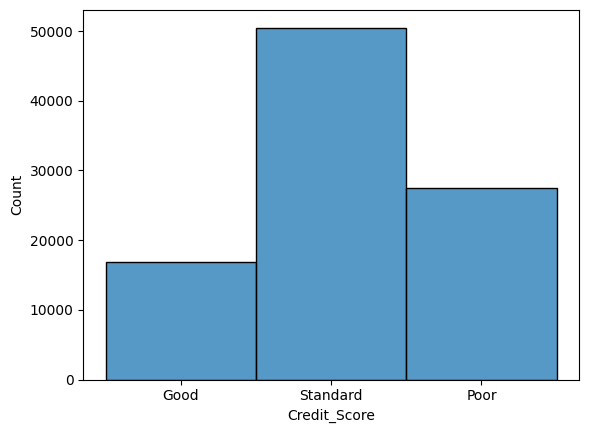

In [79]:
sns.histplot(y)

In [80]:
y = y.map({'Poor':0,'Good':1,'Standard':2})

In [81]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((75896, 21), (18975, 21))

# MODEL PEMBELAJARAN

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      5523
           1       0.75      0.71      0.73      3443
           2       0.80      0.80      0.80     10009

    accuracy                           0.79     18975
   macro avg       0.78      0.77      0.78     18975
weighted avg       0.79      0.79      0.79     18975



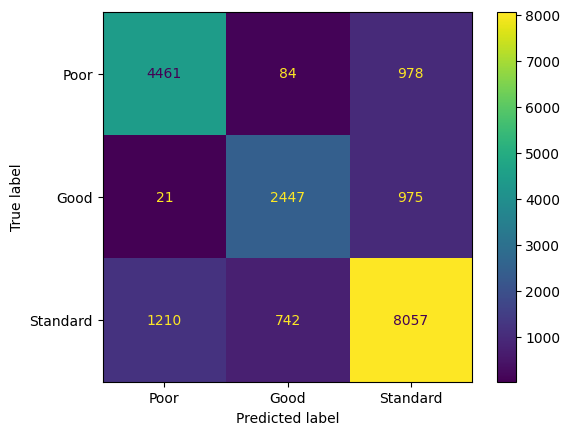

In [82]:
# @title Random Forest
model = RandomForestClassifier(random_state=1234)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      5523
           1       0.69      0.68      0.68      3443
           2       0.78      0.79      0.78     10009

    accuracy                           0.76     18975
   macro avg       0.74      0.74      0.74     18975
weighted avg       0.76      0.76      0.76     18975



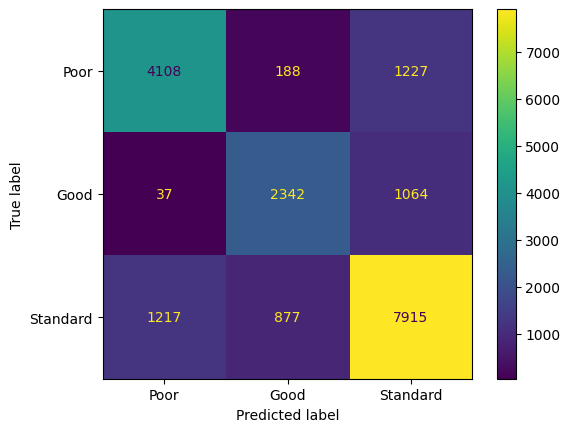

In [83]:
# @title XGBoost
model = XGBClassifier(random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
confusion_matrixDisply = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Poor','Good','Standard'])
confusion_matrixDisply.plot()

# EVALUASI MODEL

In [84]:
from sklearn.metrics import mean_absolute_error, accuracy_score, calinski_harabasz_score

# Latih model Random Forest
rf_model = RandomForestClassifier(random_state=1234)
rf_model.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

# Hitung MAE dan Akurasi untuk model Random Forest
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

print("Random Forest:")
print("MAE:", rf_mae)
print("Akurasi:", rf_accuracy)

# Latih model XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)

# Hitung MAE dan Akurasi untuk model XGBoost
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)

print("\nXGBoost:")
print("MAE:", xgb_mae)
print("Akurasi:", xgb_accuracy)

# Hitung Calinski-Harabasz Index
ch_score_rf = calinski_harabasz_score(x_test, rf_y_pred)
ch_score_xgb = calinski_harabasz_score(x_test, xgb_y_pred)

print("\nCalinski-Harabasz Index:")
print("Random Forest:", ch_score_rf)
print("XGBoost:", ch_score_xgb)


Random Forest:
MAE: 0.3266403162055336
Akurasi: 0.7886693017127799

XGBoost:
MAE: 0.37175230566534917
Akurasi: 0.7570487483530962

Calinski-Harabasz Index:
Random Forest: 1.6018143158248848
XGBoost: 1.7706641327632073


In [85]:
# Hitung standar deviasi MAE untuk Random Forest
rf_mae_std = np.std([mean_absolute_error(y_test, rf_model.predict(x_test)) for _ in range(10)])

# Hitung standar deviasi MAE untuk XGBoost
xgb_mae_std = np.std([mean_absolute_error(y_test, xgb_model.predict(x_test)) for _ in range(10)])


In [86]:
import time

# Hitung waktu pelatihan dan prediksi untuk Random Forest
rf_start_time = time.time()
rf_model.fit(x_train, y_train)
rf_end_time = time.time()
rf_training_time = rf_end_time - rf_start_time

rf_start_time = time.time()
rf_y_pred = rf_model.predict(x_test)
rf_end_time = time.time()
rf_prediction_time = rf_end_time - rf_start_time

# Hitung waktu pelatihan dan prediksi untuk XGBoost
xgb_start_time = time.time()
xgb_model.fit(x_train, y_train)
xgb_end_time = time.time()
xgb_training_time = xgb_end_time - xgb_start_time

xgb_start_time = time.time()
xgb_y_pred = xgb_model.predict(x_test)
xgb_end_time = time.time()
xgb_prediction_time = xgb_end_time - xgb_start_time


In [87]:
# @title MAE
print("MAE Random Forest:", rf_mae)
print("MAE XGBoost:", xgb_mae)


MAE Random Forest: 0.3266403162055336
MAE XGBoost: 0.37175230566534917


In [88]:
# @title AKURASI
print("Akurasi Random Forest:", rf_accuracy)
print("Akurasi XGBoost:", xgb_accuracy)


Akurasi Random Forest: 0.7886693017127799
Akurasi XGBoost: 0.7570487483530962


In [89]:
# @title Calinski-Harabasz
print("Calinski-Harabasz Index Random Forest:", ch_score_rf)
print("Calinski-Harabasz Index XGBoost:", ch_score_xgb)


Calinski-Harabasz Index Random Forest: 1.6018143158248848
Calinski-Harabasz Index XGBoost: 1.7706641327632073


# REKOMENDASI

In [90]:
# @title Jika Anda mengutamakan akurasi klasifikasi
if rf_accuracy > xgb_accuracy:
    recommended_model = "Random Forest"
else:
    recommended_model = "XGBoost"

print("Rekomendasi model untuk akurasi klasifikasi:", recommended_model)

Rekomendasi model untuk akurasi klasifikasi: Random Forest


In [91]:
# @title Jika Anda mengutamakan presisi dalam prediksi nilai
if rf_mae < xgb_mae:
    recommended_model = "Random Forest"
else:
    recommended_model = "XGBoost"

print("Rekomendasi model untuk presisi prediksi nilai:", recommended_model)

Rekomendasi model untuk presisi prediksi nilai: Random Forest


In [92]:
# @title Rekomendasi model untuk kestabilan kinerja
if rf_mae_std < xgb_mae_std:
    recommended_model_stability = "Random Forest"
else:
    recommended_model_stability = "XGBoost"

print("Rekomendasi model untuk kestabilan kinerja: ", recommended_model_stability)

Rekomendasi model untuk kestabilan kinerja:  Random Forest


In [93]:
# @title Jika ingin mengoptimalkan waktu komputasi
# Misalkan rf_training_time dan xgb_training_time adalah waktu pelatihan masing-masing model
# Misalkan rf_prediction_time dan xgb_prediction_time adalah waktu prediksi masing-masing model
# Anda dapat mempertimbangkan total waktu pelatihan dan prediksi, atau mungkin hanya waktu prediksi jika itu yang paling penting bagi Anda

if (rf_training_time + rf_prediction_time) < (xgb_training_time + xgb_prediction_time):
    recommended_model = "Random Forest"
else:
    recommended_model = "XGBoost"

print("Rekomendasi model untuk optimasi waktu komputasi:", recommended_model)

Rekomendasi model untuk optimasi waktu komputasi: XGBoost


In [94]:
# @title Jika interpretasi model penting
# Anda mungkin ingin mempertimbangkan fitur importance dari Random Forest atau kontribusi fitur dari XGBoost

random_forest_interpretable = True

interpretability_criteria = "Random Forest" if random_forest_interpretable else "XGBoost"
print("Rekomendasi model untuk interpretasi:", interpretability_criteria)


Rekomendasi model untuk interpretasi: Random Forest
